In [5]:
#Monte Carlo simulation
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
%matplotlib inline

#load csv containing return data on assets
assets = pd.read_csv('Portfolio_2.csv',header='infer',index_col='Date')


In [6]:
assets.head(5)

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Date,,,,,,,,,,
2015-04-01,549.489990,81.669998,59.017143,370.260010,73.779182,139.591400,81.300003,31.535204,68.523880,87.257195
2015-04-02,541.309998,81.559998,59.154285,372.250000,74.233482,140.882874,81.120003,32.055969,67.968102,87.807785
2015-04-06,543.950012,82.440002,60.330002,377.040009,74.900414,141.691223,80.980003,32.287418,69.050911,88.532707
2015-04-07,544.859985,82.320000,60.494286,374.410004,74.136803,141.022232,80.580002,32.104183,67.824371,88.284943
2015-04-08,548.840027,82.279999,63.049999,381.200012,75.084068,141.226639,83.529999,32.046318,67.345238,88.119774


In [7]:
assets.tail(5)

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Date,,,,,,,,,,
2018-03-23,1026.550049,159.389999,300.940002,1495.560059,21.299999,180.839996,91.949997,35.450001,83.919998,106.150002
2018-03-26,1054.089966,160.059998,320.350006,1555.859985,21.070000,187.220001,95.209999,36.580002,85.220001,106.809998
2018-03-27,1006.940002,152.220001,300.690002,1497.050049,20.250000,183.149994,93.629997,36.080002,83.660004,107.639999
2018-03-28,1005.179993,153.029999,285.769989,1431.420044,20.610001,183.610001,93.910004,35.500000,82.320000,109.180000
2018-03-29,1037.140015,159.789993,295.350006,1447.339966,20.990000,188.429993,94.900002,36.369999,83.239998,109.150002


In [8]:
returns = (assets/assets.shift(1))-1
returns.head()

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Date,,,,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-02,-0.014887,-0.001347,0.002324,0.005375,0.006158,0.009252,-0.002214,0.016514,-0.008111,0.006310
2015-04-06,0.004877,0.010790,0.019875,0.012868,0.008984,0.005738,-0.001726,0.007220,0.015931,0.008256
2015-04-07,0.001673,-0.001456,0.002723,-0.006975,-0.010195,-0.004721,-0.004940,-0.005675,-0.017763,-0.002799
2015-04-08,0.007305,-0.000486,0.042247,0.018135,0.012777,0.001449,0.036610,-0.001802,-0.007064,-0.001871


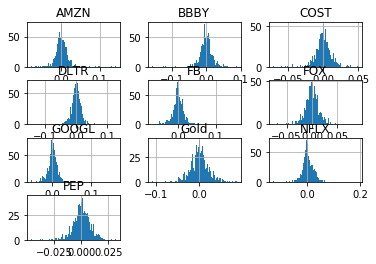

In [9]:
returns.hist(bins=100)
plt.show()

In [10]:
log_returns = np.log((assets/assets.shift(1)))

log_returns.head()

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Date,,,,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-02,-0.014998,-0.001348,0.002321,0.005360,0.006139,0.009209,-0.002216,0.016379,-0.008144,0.006290
2015-04-06,0.004865,0.010732,0.019680,0.012786,0.008944,0.005721,-0.001727,0.007194,0.015806,0.008222
2015-04-07,0.001672,-0.001457,0.002719,-0.007000,-0.010247,-0.004733,-0.004952,-0.005691,-0.017922,-0.002802
2015-04-08,0.007278,-0.000486,0.041379,0.017973,0.012696,0.001448,0.035955,-0.001804,-0.007089,-0.001873


In [13]:
#Covariance Matris
cov_mat = log_returns.cov()*252
cov_mat

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
GOOGL,0.051703,0.037923,0.040084,0.037761,0.006759,0.014809,0.017474,0.016526,0.003415,0.011622
FB,0.037923,0.063865,0.041359,0.041199,0.006268,0.012379,0.015795,0.018267,0.004893,0.011475
NFLX,0.040084,0.041359,0.174764,0.048329,0.011944,0.016129,0.022053,0.023956,0.009260,0.011262
AMZN,0.037761,0.041199,0.048329,0.077447,0.004387,0.013007,0.015140,0.020239,0.005545,0.010551
BBBY,0.006759,0.006268,0.011944,0.004387,0.099406,0.016719,0.031556,0.020358,0.002565,0.004672
COST,0.014809,0.012379,0.016129,0.013007,0.016719,0.034535,0.021681,0.011282,-0.002043,0.010648
DLTR,0.017474,0.015795,0.022053,0.015140,0.031556,0.021681,0.079864,0.018325,-0.000960,0.010233
FOX,0.016526,0.018267,0.023956,0.020239,0.020358,0.011282,0.018325,0.060808,0.000715,0.008245
Gold,0.003415,0.004893,0.009260,0.005545,0.002565,-0.002043,-0.000960,0.000715,0.127163,0.006395
PEP,0.011622,0.011475,0.011262,0.010551,0.004672,0.010648,0.010233,0.008245,0.006395,0.017353


In [12]:
#Correlation Matrix
corr_mat = log_returns.corr()
corr_mat

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
GOOGL,1.000000,0.659948,0.421682,0.596727,0.094283,0.350461,0.271933,0.294732,0.042117,0.388017
FB,0.659948,1.000000,0.391481,0.585806,0.078667,0.263593,0.221170,0.293131,0.054295,0.344700
NFLX,0.421682,0.391481,1.000000,0.415408,0.090621,0.207611,0.186670,0.232387,0.062117,0.204512
AMZN,0.596727,0.585806,0.415408,1.000000,0.050001,0.251497,0.192502,0.294913,0.055871,0.287823
BBBY,0.094283,0.078667,0.090621,0.050001,1.000000,0.285347,0.354165,0.261850,0.022818,0.112488
COST,0.350461,0.263593,0.207611,0.251497,0.285347,1.000000,0.412833,0.246201,-0.030832,0.434950
DLTR,0.271933,0.221170,0.186670,0.192502,0.354165,0.412833,1.000000,0.262965,-0.009527,0.274878
FOX,0.294732,0.293131,0.232387,0.294913,0.261850,0.246201,0.262965,1.000000,0.008136,0.253833
Gold,0.042117,0.054295,0.062117,0.055871,0.022818,-0.030832,-0.009527,0.008136,1.000000,0.136136
PEP,0.388017,0.344700,0.204512,0.287823,0.112488,0.434950,0.274878,0.253833,0.136136,1.000000


In [14]:
#Random weights via Monte Carlo Method
#set seed for reproduceable results
np.random.seed(600)
number_port = 25000
number_assets = len(assets.columns)

#array to store weights
weights_store = np.zeros((number_port,len(assets.columns)))

#array to store returns
returns_store = np.zeros(number_port)

#array to store returns
vol_store = np.zeros(number_port)

#array to store Sharpe Ratio info
sharpe_store=np.zeros(number_port)

#set Riskfree Rate, necessary for sharpe ratio
Rf = .015

for x in range(number_port):
    #Weights
    weights = np.array(np.random.random(number_assets))
    weights /= np.sum(weights)
    #Save Weights
    weights_store[x,:] = weights
    
    #Save Expected Returns
    returns_store[x] = np.sum(weights*log_returns.mean())*252
   
    #Save Expected Volatility
    vol_store[x] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252, weights)))
   
    #Save Sharpe Ratio
    sharpe_store[x] = (returns_store[x] - Rf)/vol_store[x]
    
print('Max Sharpe Ratio:',sharpe_store.max(),'Min Vol:',vol_store.min())

Max Sharpe Ratio: 1.5130528738159625 Min Vol: 0.12654536358254154


In [15]:
#Find location and allocation of Max Sharpe portfolio
max_sharpe_idx = np.argmax(sharpe_store)
max_sharpe_return = returns_store[max_sharpe_idx]
max_sharpe_vol = vol_store[max_sharpe_idx]
max_sharpe_wght = weights_store[max_sharpe_idx]

max_sharpe_allocation = pd.DataFrame(weights_store[max_sharpe_idx],index=returns.columns,columns=['Max_Sharpe_Allocation'])
max_sharpe_allocation.Max_Sharpe_Allocation = [round(i*100,2)for i in max_sharpe_allocation.Max_Sharpe_Allocation]
max_sharpe_allocation = max_sharpe_allocation.T

max_sharpe_allocation

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Max_Sharpe_Allocation,7.7,12.1,23.12,23.94,0.43,2.93,2.58,0.51,3.67,23.03


In [16]:
print('Max Sharpe Portfolio Returns = ',max_sharpe_return)
print('Max Sharpe Portfolio Vol = ',max_sharpe_vol)

Max Sharpe Portfolio Returns =  0.299334925592094
Max Sharpe Portfolio Vol =  0.18792134135735336


In [17]:
#Find location and allocation of Min Vol portfolio
min_vol_idx = np.argmin(vol_store)
min_vol_return = returns_store[min_vol_idx]
min_vol_vol = vol_store[min_vol_idx]
min_vol_allocation = pd.DataFrame(weights_store[min_vol_idx],index=returns.columns,columns=['Min_Vol_Allocation'])
min_vol_allocation.Min_Vol_Allocation = [round(i*100,2)for i in min_vol_allocation.Min_Vol_Allocation]
min_vol_allocation = min_vol_allocation.T

min_vol_allocation

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX,Gold,PEP
Min_Vol_Allocation,4.63,1.38,0.5,6.62,4.95,19.43,7.17,10.93,17.16,27.22


In [18]:
print('Min Vol Portfolio Returns = ',min_vol_return)
print('Min Vol Portfolio Vol = ',min_vol_vol)

Min Vol Portfolio Returns =  0.08490098513644298
Min Vol Portfolio Vol =  0.12654536358254154


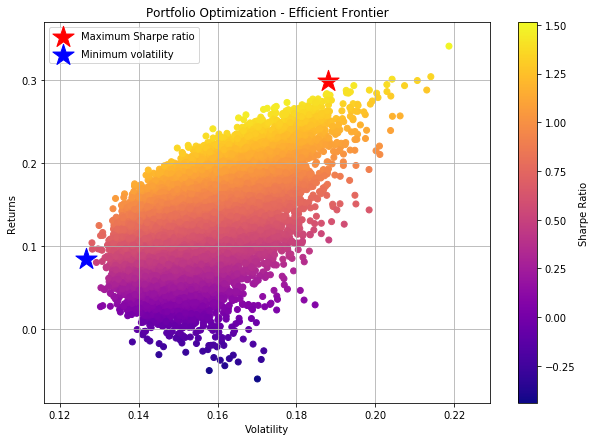

In [19]:
plt.figure(figsize=(10, 7))
#Assign data to axis, Vol,Returns, C= Sharpe Ratio, Cmap = 'Style'
plt.scatter(vol_store,returns_store,c=sharpe_store,cmap='plasma')
#Label Colorbar
plt.colorbar(label='Sharpe Ratio')
#Label Maximum Sharpe and Minimum Vol
plt.scatter(max_sharpe_vol,max_sharpe_return,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
plt.scatter(min_vol_vol,min_vol_return,marker='*',color='b',s=500, label='Minimum volatility')
#Provide a title
plt.title('Portfolio Optimization - Efficient Frontier')
plt.grid(True)
#Label X and Y Access
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.legend(labelspacing=0.8)
plt.show()